## Observations and Insights

1. According to the scatter plot and linear regression model for the Capomulin regimen, it seems that as a mouse's weight increases, its tumor volume also increases. There is also a strong postive correlation between Weight and Average Tumor Volume with the correlation coefficient being 0.84.

2. Of the four most promising treatment regimens, it appears that Capomolin and Ramicane were the most successful, accoridng to the boxplots. They seem to retain the smallest spread of tumor volumes as well as the smallest size of mouse tumors.

3. The gender distribution of mice for this study appears to be almost equal with female mice occupying 49.8%
   and males occupying 50.2%.

## Dependencies and starter code

In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [172]:
# Generate a summary statistics table of mean, median,
# variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Summary stat data frame
summary_stat = pd.DataFrame({"Mean": mean, "Median": med, "Variance": var, "Standard Deviation": stdev, 
                          "SEM": sem})
summary_stat


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

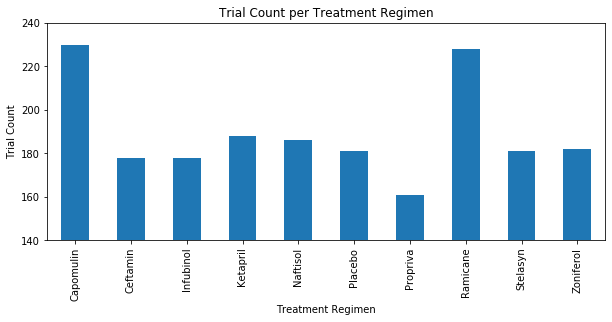

<Figure size 432x288 with 0 Axes>

In [192]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

# Filter df to include only required columns
datapoints = grouped_df[["Drug Regimen","Mouse ID"]]

# Set the index for Drug Regimen labels
datapoints = datapoints.set_index("Drug Regimen")


# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(10,4), ylim=(140,240), legend=False)

# Chart title, labels, and show
plt.title("Trial Count per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Trial Count")
plt.show()
plt.tight_layout()

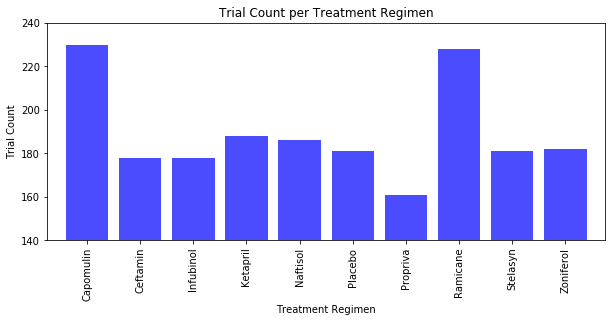

<Figure size 432x288 with 0 Axes>

In [202]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations

x_axis = np.arange(len(grouped_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis, grouped_df["Mouse ID"], color = "b", alpha = .7, align = 'center')
plt.xticks(tick_locations, grouped_df["Drug Regimen"], rotation="vertical")

# plt.xticks( site2['Cl'], site2.index.values ) # location, labels
# plt.plot( site2['Cl'] )
# plt.show()

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(140, grouped_df['Mouse ID'].max()+10)

# Chart title, labels, and show
plt.title("Trial Count per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Trial Count")
plt.show()
plt.tight_layout()

## Pie plots

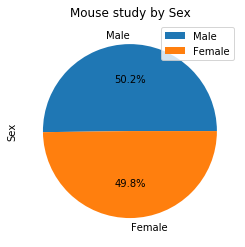

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Mouse gender data frame
gender_df=combined_df[['Mouse ID','Sex']].drop_duplicates()['Sex'].value_counts().to_frame()

#extract index(which is male and female)
gender = gender_df.keys()

# Create a pie chart based on sex
pie_chart = gender_df.plot(kind="pie", y=gender,autopct='%1.1f%%', title="Mouse study by Sex")



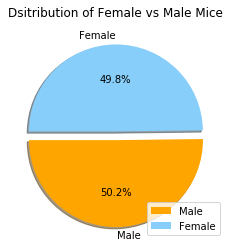

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Where to separate sections
explode = (0.1, 0)

# Plot and format pie chart
plt.pie(gender_df['Sex'], explode=explode, labels=gender_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

plt.title("Dsitribution of Female vs Male Mice")

plt.legend(loc='lower right')

plt.show()

## Quartiles, outliers and boxplots

In [156]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_volume = combined_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

# Grab the final tumor volume for each mouse
final_volume_df = pd.DataFrame(columns=['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)'])

row_count = 0

for i, row in tumor_volume.loc[1:len(combined_df),].iterrows():
    if tumor_volume.loc[i-1]['Mouse ID'] != tumor_volume.loc[i]['Mouse ID']:
         final_volume_df.loc[row_count]=tumor_volume.loc[i-1]
         row_count+=1
        
# Add final mouse
final_volume_df.loc[len(final_volume_df)]=tumor_volume.loc[len(tumor_volume)-1]



# Capomulin data frame
Capomulin_df = final_volume_df[final_volume_df['Drug Regimen']=="Capomulin"]

# Ramicane data frame
Ramicane_df = final_volume_df[final_volume_df['Drug Regimen']=="Ramicane"]

# Infubinol data frame
Infubinol_df = final_volume_df[final_volume_df['Drug Regimen']=="Infubinol"]

# Ceftamin data frame
Ceftamin_df = final_volume_df[final_volume_df['Drug Regimen']=="Ceftamin"]


# Determine if there are any outliers

# Outliers in Capomulin
Capomulin_df_qt = Capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Capomulin_df_qt[0.25]
upperq = Capomulin_df_qt[0.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5 * iqr), 2)
upper_bound = round(upperq + (1.5 * iqr), 2) 
outliers = Capomulin_df[(Capomulin_df['Tumor Volume (mm3)'] < lower_bound) | (Capomulin_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_num = len(outliers)

if outlier_num > 0:
     print(f"There are {outlier_num} outliers in the Capomulin treatment regimen, which are \n {outliers} \n")
else:
     print(f"There are zero outliers in the Capomulin treatment regimen.")



# Outliers in Ramicane
Ramicane_df_qt = Ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Ramicane_df_qt[0.25]
upperq = Ramicane_df_qt[0.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5 * iqr), 2)
upper_bound = round(upperq + (1.5 * iqr), 2) 
outliers = Ramicane_df[(Ramicane_df['Tumor Volume (mm3)'] < lower_bound) | (Ramicane_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_num = len(outliers)

if outlier_num > 0:
     print(f"There are {outlier_num} outliers in the Ramicane treatment regimen, which are \n {outliers} \n")
else:
     print(f"There are zero outliers in the Ramicane treatment regimen.")




# Outliers in Infubinol
Infubinol_df_qt = Infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Infubinol_df_qt[0.25]
upperq = Infubinol_df_qt[0.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5 * iqr), 2)
upper_bound = round(upperq + (1.5 * iqr), 2) 
outliers = Infubinol_df[(Infubinol_df['Tumor Volume (mm3)'] < lower_bound) | (Infubinol_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_num = len(outliers)

if outlier_num > 0:
     print(f"There are {outlier_num} outliers in the Infubinol treatment regimen, which are \n {outliers} \n")
else:
     print(f"There are zero outliers in the Infubinol treatment regimen.")




# Outliers in Ceftamin
Ceftamin_df_qt = Ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Ceftamin_df_qt[0.25]
upperq = Ceftamin_df_qt[0.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5 * iqr), 2)
upper_bound = round(upperq + (1.5 * iqr), 2) 
outliers = Ceftamin_df[(Ceftamin_df['Tumor Volume (mm3)'] < lower_bound) | (Ceftamin_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_num = len(outliers)

if outlier_num > 0:
     print(f"There are {outlier_num} outliers in the Ceftamin treatment regimen, which are \n {outliers} \n")
else:
     print(f"There are zero outliers in the Ceftamin treatment regimen.")


There are zero outliers in the Capomulin treatment regimen.
There are zero outliers in the Ramicane treatment regimen.
There are 1 outliers in the Infubinol treatment regimen, which are 
    Mouse ID Drug Regimen  Tumor Volume (mm3)
74     c326    Infubinol           36.321346 

There are zero outliers in the Ceftamin treatment regimen.


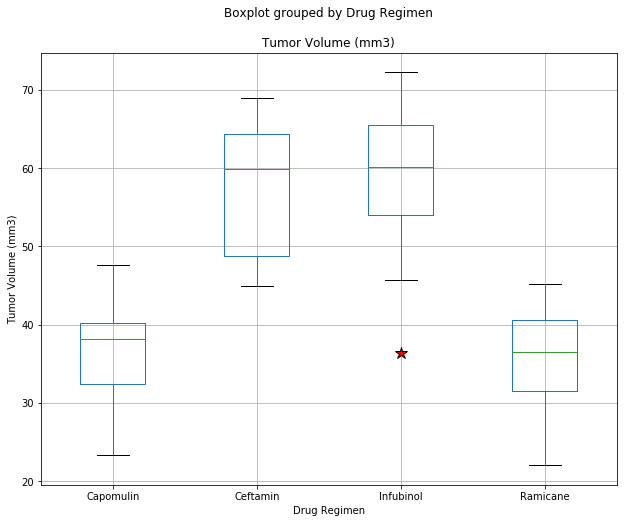

In [157]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Filter data frame to include only the four regimens of interest
four_df = final_volume_df[(final_volume_df['Drug Regimen'] == "Capomulin") | (final_volume_df['Drug Regimen'] == "Ramicane") | 
            (final_volume_df['Drug Regimen'] == "Infubinol") | (final_volume_df['Drug Regimen'] == "Ceftamin")]

# Create and format box plot
fig1, ax1 = plt.subplots(figsize = (10,8))
red_square = dict(markerfacecolor = 'r', marker = '*', markersize = 12)
box_plot = four_df.boxplot(ax=ax1, column = 'Tumor Volume (mm3)', by = 'Drug Regimen', flierprops=red_square)
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Time Point vs Tumor Volume for Single Mouse Treated with Capomulin')

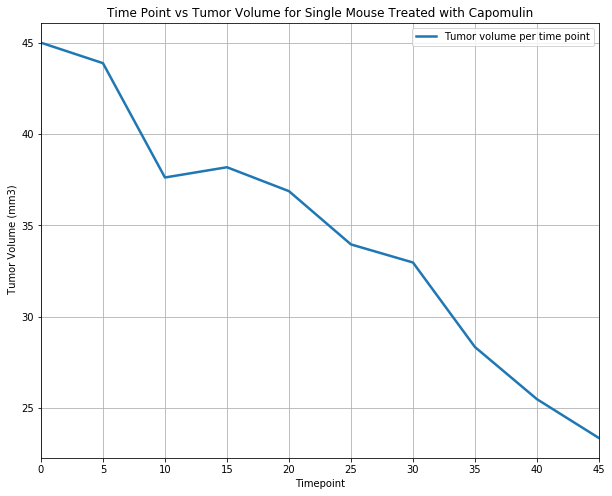

In [160]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a new data frame for capomulin
cap_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
cap_df = cap_df.reset_index()

# Grab a single mouse's data
single_df = cap_df.loc[cap_df["Mouse ID"] == "s185"]

# Filter data frame to included requirements
single_df = single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_df.index

# Reset index
single_df = single_df.reset_index(drop=True)

# Create line plot
single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5)
plt.legend(['Tumor volume per time point'], loc="best")
plt.xlabel("Timepoint")
plt.ylabel(" Tumor Volume (mm3)")
plt.grid()
plt.title("Time Point vs Tumor Volume for Single Mouse Treated with Capomulin")

The correlation coefficient between Weight and Average Tumor Volume is 0.84


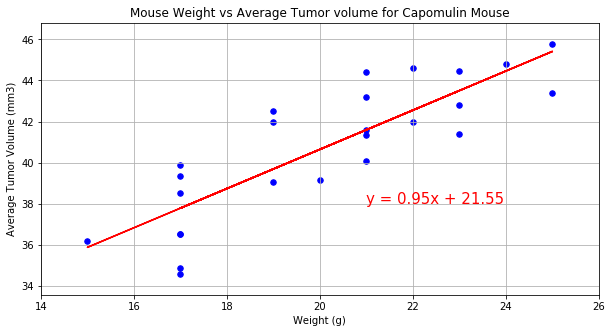

In [162]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create new data frame for needed columns
new_df=combined_df[["Mouse ID","Drug Regimen","Weight (g)","Tumor Volume (mm3)"]]

# Create data frame for average tumor volume in the Capomulin regimen
avg_cap=new_df[new_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean().reset_index()

# Create and format scatter plot
plt.figure(figsize = (10,5))
scatter=plt.scatter(avg_cap["Weight (g)"],avg_cap["Tumor Volume (mm3)"], marker="o", 
            facecolors="blue", s = 30)
plt.xlim(min(avg_cap["Weight (g)"])-1, max(avg_cap["Weight (g)"])+1)
plt.ylim(min(avg_cap["Tumor Volume (mm3)"]-1), max(avg_cap["Tumor Volume (mm3)"])+1)
plt.title("Mouse Weight vs Average Tumor volume for Capomulin Mouse")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

# Calculate the correlation coefficient and linear regression model for mouse weight and
# average tumor volume for the Capomulin regimen

# Correlation Coefficient
print(f"The correlation coefficient between Weight and Average Tumor Volume is \
{round(st.pearsonr(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])[0], 2)}")

# Linear Regression Model (y=mx+b)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
regress_values = avg_cap['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot line
linear_regression=plt.plot(avg_cap['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (21,38), fontsize=15, color="red")
plt.show()
